In [13]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [66]:
# Sets API Key and imports Amazon Stock price data from 1997-2018 into a dataframe
quandl.ApiConfig.api_key = 'jHbxFH6wFdFxHWHt9fnB'
df = quandl.get('WIKI/AMZN')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


In [67]:
# Reassign df to include dates and closing data
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


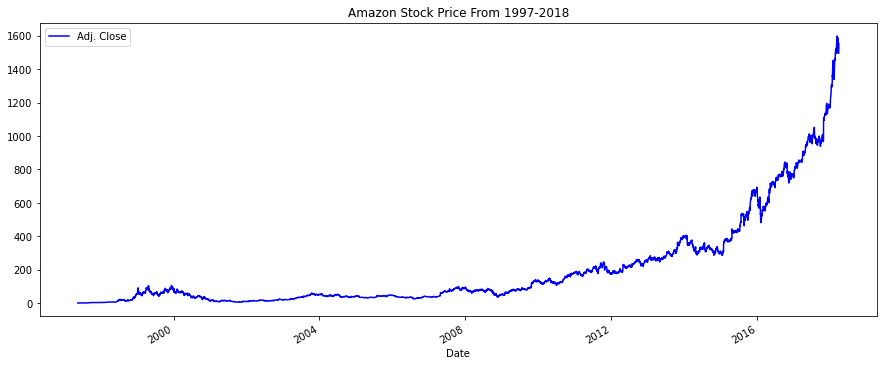

In [68]:
# Plots the amazon stock price data from 1997-2018
df['Adj. Close'].plot(figsize=(15,6), color='b')
plt.legend(loc = 'upper left')
plt.title('Amazon Stock Price From 1997-2018')
plt.show()

In [71]:
# Creates the X and y necessary to predict stock prices 30 days into the future

# Creates 'Prediction' column with stock values 30 days into the future with the 'shift' function of values in the 'Adj. Close' column
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

# Gets the 'Adj. Close' column
X = np.array(df['Adj. Close'])
# Scales/standardizes (mean = 0, std = 1) that column data
X = preprocessing.scale(X)
# Gets the last 30 days of the forecast which are 'NaN' values
X_forecast = X[-forecast:]
# X is set to all but the last 30 scaled values since those are all 'NaN'
X = X[:-forecast]

# y is set to all but the last 30 values since those are all 'NaN'
y = np.array(df['Prediction']) 
y = y[:-forecast]

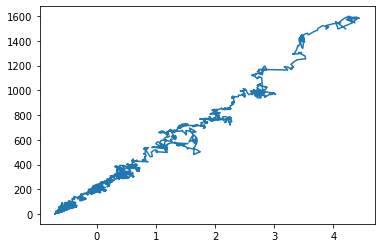

In [72]:
plt.plot(X,y)

In [ ]:
# Splits data into training and test sets and fits Linear Regression Model to training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)